<center><h1>Last_First_HW2</h1></center>
<br>
<br>

Name: Tang Lin
<br>
Github Username: MeLinOrDoreen
<br>
USC ID: 9012859074

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# to surpress warnings
import warnings
warnings.filterwarnings("ignore")

Get the Cycle Power Plant Data Set

In [67]:
plant_df = pd.read_excel("../Data_CCPP/Folds5x2_pp.xlsx", sheet_name = 'Sheet1')

### (b) Exploring the data

#### i. rows and columns

In [68]:
print(f"This dataframe has: {plant_df.shape[0]} rows and {plant_df.shape[1]} columns.", "\n")

print("The rows represent the oberservations.", "\n")

print("The columns represent the features of each observation.")

This dataframe has: 9568 rows and 5 columns. 

The rows represent the oberservations. 

The columns represent the features of each observation.


#### ii. pairwise scatterplots of all the varianbles

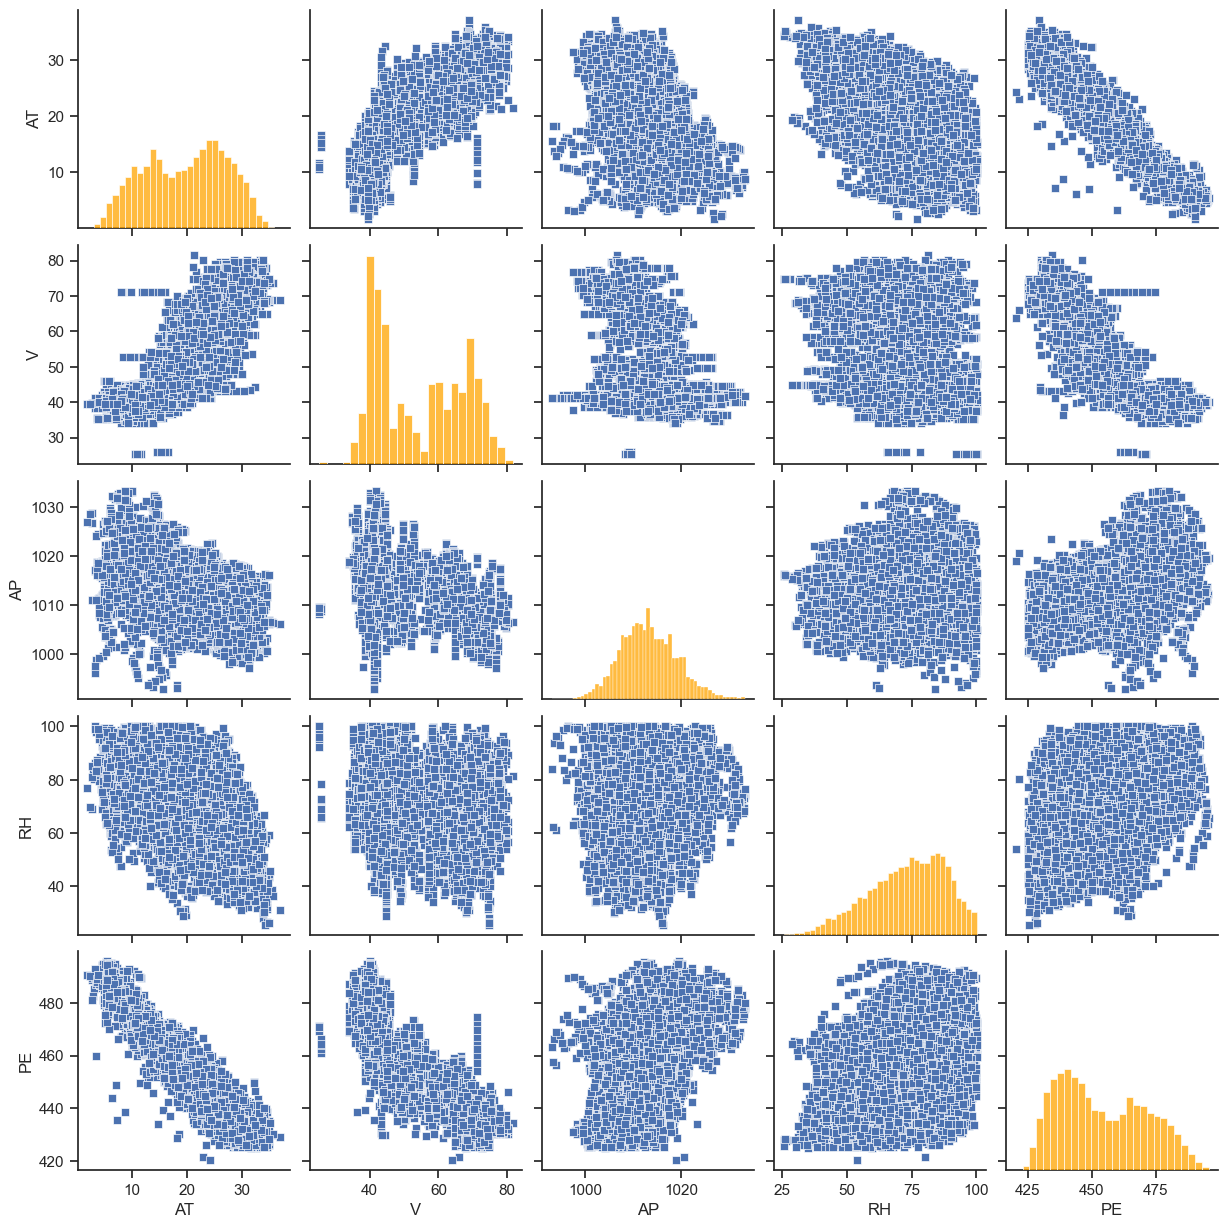

In [69]:
sns.set_theme(style="ticks")
sns.pairplot(plant_df,plot_kws= {'marker': 's'}, diag_kws= {'color': 'orange'})

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [70]:
summary_table = pd.DataFrame()
summary_table.index = ['Mean', 'Median', 'Min', 'Max', 'First Quartile', 'Third Quartile', 'IQR']

for col in plant_df.columns:
    mean = plant_df[col].mean()
    median = plant_df[col].median()
    min = plant_df[col].min()
    max = plant_df[col].max()

    q1 = plant_df[col].quantile(0.25)
    q3 = plant_df[col].quantile(0.75)

    iqr = q3 - q1

    summary_table[col] = [mean, median, min, max, q1, q3, iqr]

summary_table

,AT,V,AP,RH,PE
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Min,1.810000,25.360000,992.890000,25.560000,420.260000
Max,37.110000,81.560000,1033.300000,100.160000,495.760000
First Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
Third Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:49:13   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

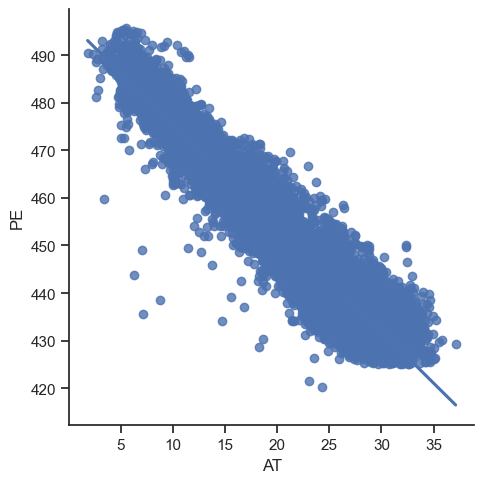

In [71]:
# for AT & PE
x = pd.DataFrame(plant_df["AT"])
y = pd.DataFrame(plant_df["PE"])
x2 = sm.add_constant(x)

slr_model = sm.OLS(y, x2)
result = slr_model.fit()

sns.lmplot(data=plant_df, x="AT", y="PE")

print(result.summary())

print('\n', f'For AT and PE, the regression equation will be PE = {result.params[0]} - {result.params[1]} * AT.')

print('\n', 'Based on the regression result (p-values < 0.01), there is a statiscally significant relationship between AT and PE.')

print('\n', 'Also, from the plot we can see there might be a linear relationship.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:49:14   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

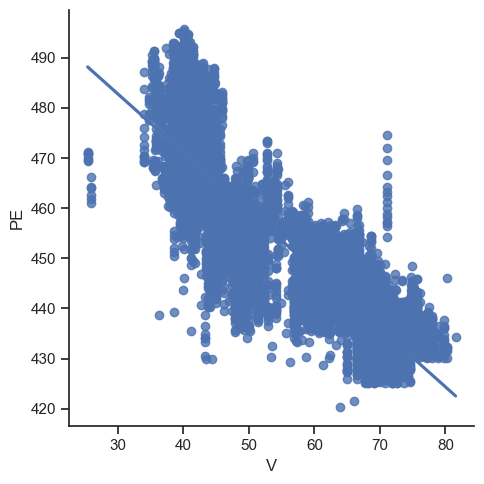

In [72]:
# for V & PE
x = pd.DataFrame(plant_df["V"])
y = pd.DataFrame(plant_df["PE"])
x2 = sm.add_constant(x)

slr_model = sm.OLS(y, x2)
result = slr_model.fit()

sns.lmplot(data=plant_df, x="V", y="PE")

print(result.summary())

print('\n', f'For V and PE, the regression equation will be PE = {result.params[0]} - {result.params[1]} * V.')

print('\n', 'Based on the regression result (p-values < 0.01), there is a statiscally significant relationship between V and PE.')

print('\n', 'Also, from the plot we can see there might be a linear relationship.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:49:14   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

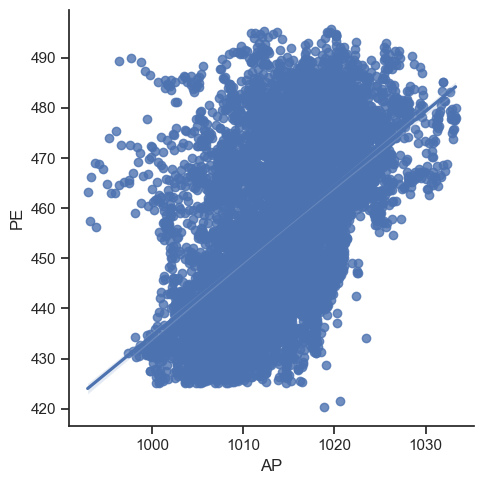

In [73]:
# for AP & PE
x = pd.DataFrame(plant_df["AP"])
y = pd.DataFrame(plant_df["PE"])
x2 = sm.add_constant(x)

slr_model = sm.OLS(y, x2)
result = slr_model.fit()

sns.lmplot(data=plant_df, x="AP", y="PE")

print(result.summary())

print('\n', f'For AP and PE, the regression equation will be PE = {result.params[0]} - {result.params[1]} * AP.')

print('\n', 'Based on the regression result (p-values < 0.01), there is a statiscally significant relationship between AP and PE.')

print('\n', 'However, based on the plot, the a linear relationship is no so obvious and the linear regression might not explain the relationship well.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:49:15   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

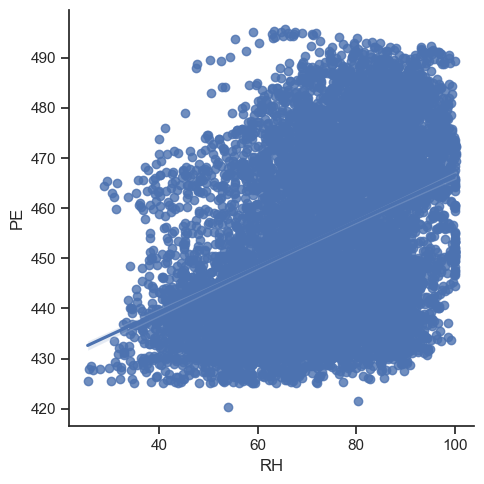

In [74]:
# for RH & PE
x = pd.DataFrame(plant_df["RH"])
y = pd.DataFrame(plant_df["PE"])
x2 = sm.add_constant(x)

slr_model = sm.OLS(y, x2)
result = slr_model.fit()

sns.lmplot(data=plant_df, x="RH", y="PE")

print(result.summary())

print('\n', f'For RH and PE, the regression equation will be PE = {result.params[0]} - {result.params[1]} * RH.')

print('\n', 'Based on the regression result (p-values < 0.01), there is a statiscally significant relationship between RH and PE.')

print('\n', 'However, based on the plot, the a linear relationship is no so obviousthe, the linear regression might not explain the relationship well.')

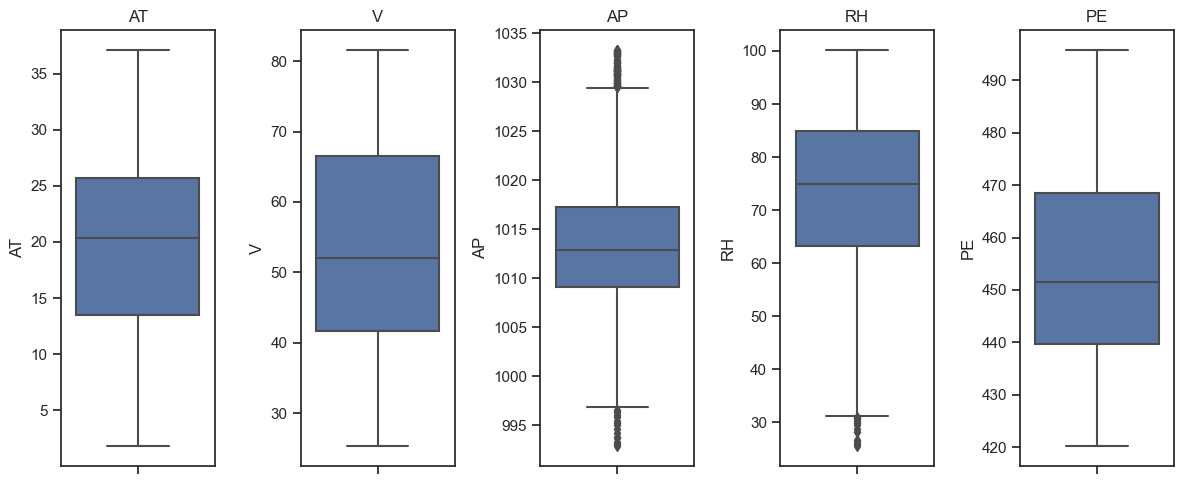

In [75]:
# Use box plot to better determine if there are outliers
fig, axes = plt.subplots(nrows= 1, ncols= 5, figsize=(12, 5))

for i, predictor in enumerate(plant_df.columns):
    sns.boxplot(y = predictor, data = plant_df, ax = axes[i])
    axes[i].set_title(predictor)

plt.tight_layout()

Based on the scatter plots and boxplots, there are some outliers we might like to remove from predictors like AP and RH. But we don't have enough information to decide if we can remove them.

### (d) Multiple Regression

In [76]:
x_multi = pd.DataFrame(plant_df.iloc[:, :-1])
y = pd.DataFrame(plant_df["PE"])
x2_multi = sm.add_constant(x_multi)

slr_model = sm.OLS(y, x2_multi)
result_multi = slr_model.fit()

print(result_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:49:15   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [77]:
# Get the p-values for each predictor
result_multi.pvalues[1:5]

AT     0.000000e+00
V     4.375305e-215
AP     5.507109e-11
RH    3.104584e-293
dtype: float64

Based on the regression resulted p-values, for predictor AT, V, AP, RH, we can reject the null hypothesis.

### (e) 1c Compare to 1d

    Multi_Coef  Simple_Coef
AT   -1.977513    -2.171320
V    -0.233916    -1.168135
AP    0.062083     1.489872
RH   -0.158054     0.455650


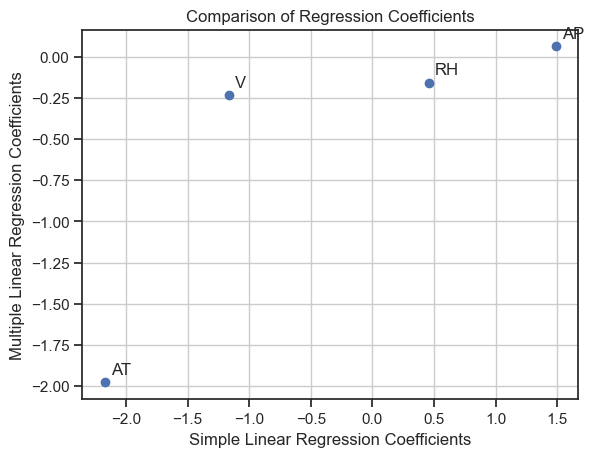

In [78]:
# Get the coefficients from the simple linear regression
simple_regression_coeffs = []

for predictor in plant_df.columns[0: -1]:
    x = pd.DataFrame(plant_df[predictor])
    y = pd.DataFrame(plant_df["PE"])
    x2 = sm.add_constant(x)

    slr_model = sm.OLS(y, x2)
    result = slr_model.fit()
    simple_regression_coeffs.append(result.params[predictor])

# Get the coefficients from the multiple linear regression
multi_regression_coeffs = result_multi.params[1:5] #from 1d
multi_regression_coeffs.name = 'Multi_Coef'

# Combine coefficient list and series and make comparison
simple_regression_coeffs = pd.Series(simple_regression_coeffs, index= ['AT', 'V', 'AP', 'RH'], name='Simple_Coef')

comparision = pd.concat([multi_regression_coeffs, simple_regression_coeffs], axis= 1) # combine coefficients from simple and multiple regression to better compare them

print(comparision)

# Plot the coefficent results 
plt.scatter(x = comparision['Simple_Coef'], y = comparision['Multi_Coef'])
plt.xlabel('Simple Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')

# indicate each point with its predictor name
for i, predictor in enumerate(comparision.index):
    plt.annotate(predictor, (comparision.iloc[i, 1]+0.05, comparision.iloc[i, 0]+0.05))
    
plt.title('Comparison of Regression Coefficients')

plt.grid(True)

As we can see from the comparison result table and the scatter plot, the results from 1c and 1d are different. We have different coefficiencts resulted from the multiple regression and simple linear regression.

### (f) Nonlinear Association

In [79]:
# preparations
predictors = ['AT', 'V', 'AP', 'RH']
response = 'PE'
model_results = []

# Loop through predictor variables
for predictor in predictors:
    x = pd.DataFrame(plant_df[predictor])
    y = pd.DataFrame(plant_df[response])

    poly = PolynomialFeatures(3)
    x = poly.fit_transform(x)

    model = sm.OLS(y, x).fit()

    model_results.append(model)

# Display the results for each predictor
for i, predictor in enumerate(predictors):
    print(f"Predictor: {predictor}")
    print(model_results[i].summary())
    print("\n" + "="*80 + "\n")


Predictor: AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:49:16   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    73

In [80]:
# get the predictors with their X, X**2, X**3's p-values < 0.05 
for i, predictor in enumerate(predictors):
    if all(p < 0.05 for p in model_results[i].pvalues):
        print(f"Statistically significant predictor: {predictor}")


Statistically significant predictor: AT
Statistically significant predictor: AP
Statistically significant predictor: RH


Based on the regression results, for PE, it might have a nonlinear association with AT, AP, or RH. 

### (g) Interactions of Predictors

In [81]:

full_interaction_model = smf.ols(formula = 'PE ~ AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data = plant_df).fit()

full_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:49:16   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
# Filter out the significant features
significant_pvalues = full_interaction_model.pvalues < 0.05

full_interaction_model.pvalues[significant_pvalues]

Intercept     3.231607e-18
V             1.371251e-08
AT:V         3.333358e-117
AP            4.735732e-02
RH            4.225213e-02
AT:RH         1.216944e-10
V:AP          2.877026e-07
AP:RH         3.360557e-02
dtype: float64

As we can see from the regression results, there is evidence of association of interactions of predcitors with the response. Both p-values and f-test results are small, some additional interactions terms significantly improve the model performance.
<br>
<br>
Statistically significant interactions: (AT : V) , (AT : RH) , (V : AP), (AP : RH).

### (h) Improvement

In [83]:
# Split the train and test data by randomly selecting 70% of the data
predictors = ['AT', 'V', 'AP', 'RH']
response = 'PE'

X_train, X_test, y_train, y_test = train_test_split(plant_df[predictors], plant_df[response], 
                                                    test_size=0.3, 
                                                    random_state=42)


In [84]:
# 1. Baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

## Get the predicted values for MSE
y_train_pred_baseline = baseline_model.predict(X_train)
y_test_pred_baseline = baseline_model.predict(X_test)

## MSE values for baseline model using train & test data
mse_train_baseline = mean_squared_error(y_train, y_train_pred_baseline)
mse_test_baseline = mean_squared_error(y_test, y_test_pred_baseline)

In [85]:
# 2. Improve the model using possible interactions and nonlinear associations

## Get the dataframe with interactions and quadratic nonlinearities
X_train_improved = X_train.copy()
X_test_improved = X_test.copy()

for i, col_1 in enumerate(X_train.columns):
    # Add nonlinearities
    X_train_improved[col_1 + '_Squared'] = X_train[col_1] ** 2
    X_test_improved[col_1 + '_Squared'] = X_test[col_1] ** 2

    # Add interactions
    for col_2 in X_train.iloc[:, i+1:].columns:
        X_train_improved[col_1 + '_' + col_2] = X_train[col_1] * X_train[col_2]
        X_test_improved[col_1 + '_' + col_2] = X_test[col_1] * X_test[col_2]

X_train_improved.head()

,AT,V,AP,RH,AT_Squared,AT_V,AT_AP,AT_RH,V_Squared,V_AP,V_RH,AP_Squared,AP_RH,RH_Squared
8759,16.69,44.78,1010.41,58.18,278.5561,747.3782,16863.7429,971.0242,2005.2484,45246.1598,2605.3004,1.020928e+06,58785.6538,3384.9124
1434,24.12,58.66,1011.55,58.96,581.7744,1414.8792,24398.5860,1422.1152,3440.9956,59337.5230,3458.5936,1.023233e+06,59640.9880,3476.2816
7320,9.08,40.02,1031.20,75.34,82.4464,363.3816,9363.2960,684.0872,1601.6004,41268.6240,3015.1068,1.063373e+06,77690.6080,5676.1156
2579,9.60,41.82,1032.93,72.63,92.1600,401.4720,9916.1280,697.2480,1748.9124,43197.1326,3037.3866,1.066944e+06,75021.7059,5275.1169
9142,20.77,56.85,1012.40,83.63,431.3929,1180.7745,21027.5480,1736.9951,3231.9225,57554.9400,4754.3655,1.024954e+06,84667.0120,6993.9769


In [86]:

## Remove the insignificant features from improved data set (use statsmodels for p-values)
## Perform backward selection to remove the insignificant features
selected_features = list(X_train_improved.columns)

while len(selected_features) > 0:
    X_train_improved = X_train_improved[selected_features]
    selected_features = list(X_train_improved.columns)
    
    X_train_improved_1 = sm.add_constant(X_train_improved)
    improved_model_results = sm.OLS(y_train, X_train_improved_1).fit()
    p_values = improved_model_results.pvalues[1:]  # Exclude the constant term
    max_p_value = p_values.max()

    if max_p_value > 0.05:  # Example significance level, adjust as needed
        removed_feature = p_values.idxmax()
        if removed_feature in selected_features:
            selected_features.remove(removed_feature)

    else:
        break

## Final selected features
print("Selected Features:", selected_features)

## Final train and test data with selected features
X_train_improved = X_train_improved[selected_features]
X_test_improved = X_test_improved[selected_features]

Selected Features: ['AT', 'V', 'AP', 'RH', 'AT_Squared', 'AT_V', 'AT_AP', 'AT_RH', 'AP_Squared', 'AP_RH', 'RH_Squared']


In [87]:
## Get the predicted values for MSE
improved_model_final = LinearRegression().fit(X_train_improved, y_train)

y_train_pred_improved = improved_model_final.predict(X_train_improved)
y_test_pred_improved = improved_model_final.predict(X_test_improved)

## MSE values for improved model using train & test data
mse_train_improved = mean_squared_error(y_train, y_train_pred_improved)
mse_test_improved = mean_squared_error(y_test, y_test_pred_improved)

In [88]:
# 3. Report the MSEs for both model 
MSEs = {
    'Train Data' : [mse_train_baseline, mse_train_improved],
    'Test Data' : [mse_test_baseline, mse_test_improved]
}

index_names = ['Baseline Model', 'Improved Model']

MSE_df = pd.DataFrame(MSEs, index = index_names)

MSE_df

,Train Data,Test Data
Baseline Model,20.580840,21.239857
Improved Model,17.890843,18.660040


As we can see from the resulted MSEs, the model with interactions and quadratic linearities has better performance for its smaller MSEs in both train and test data set.

### (i) KNN

The k that gives the best fit is 5


Text(0, 0.5, 'Mean Squared Errors')

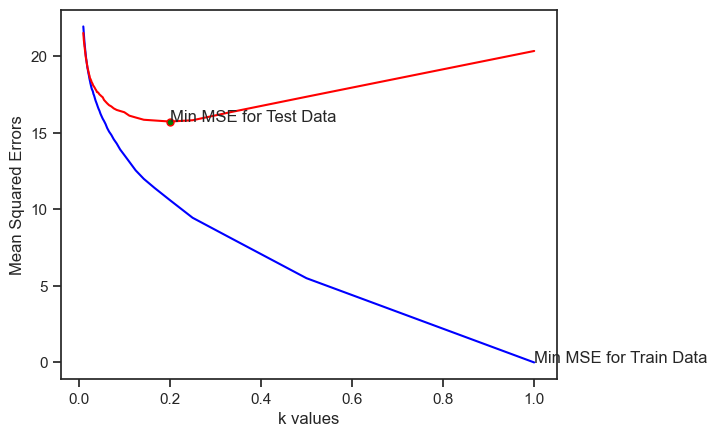

In [89]:
# 1. Perform KNN on raw features
k_values = np.arange(1, 101)

mse_raw_train = []
mse_raw_test = []

min_mse_train = float(1000000)
min_mse_test = float(10000000)

best_k_train = None
best_k_test = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)

    train_preds = knn.predict(X_train)
    test_preds = knn.predict(X_test)

    mse_train = mean_squared_error(y_train, train_preds)
    mse_test = mean_squared_error(y_test, test_preds)

    mse_raw_train.append(mse_train)
    mse_raw_test.append(mse_test)

    if mse_train < min_mse_train:
        min_mse_train = mse_train
        best_k_train = k # Find the value of k that gives the smallest MSE
    
    if mse_test < min_mse_test:
        min_mse_test = mse_test
        best_k_test = k # Find the value of k that gives the smallest MSE

print(f'The k that gives the best fit is {best_k_test}')

plt.plot(1/k_values, mse_raw_train, color = 'blue')
plt.plot(1/k_values, mse_raw_test, color = 'red')
plt.plot(1/best_k_test, min_mse_test, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
plt.annotate('Min MSE for Train Data', (1/ best_k_train, min_mse_train))
plt.annotate('Min MSE for Test Data', (1/ best_k_test, min_mse_test))
plt.xlabel('k values')
plt.ylabel('Mean Squared Errors')

The k that gives the best fit is 9


Text(0, 0.5, 'Mean Squared Errors')

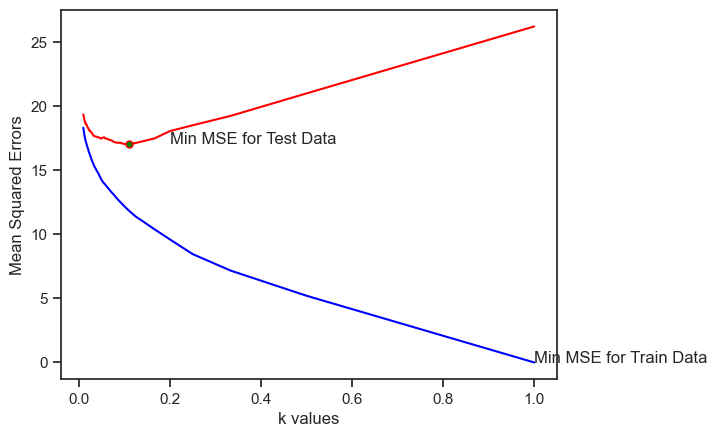

In [90]:
# 2. Perform KNN on normalized features (minmaxscaler)
scaler = MinMaxScaler()
normalized_train_data = scaler.fit_transform(X_train)
normalized_test_data = scaler.fit_transform(X_test)

X_normalized_train = pd.DataFrame(normalized_train_data, columns= X_train.columns)
X_normalized_test = pd.DataFrame(normalized_test_data, columns = X_test.columns)

k_values = np.arange(1, 101)

mse_nor_train = []
mse_nor_test = []

min_mse_nor_train = float(1000000)
min_mse_nor_test = float(10000000)

best_k_nor_train = None
best_k_nor_test = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_normalized_train, y_train)

    train_preds = knn.predict(X_normalized_train)
    test_preds = knn.predict(X_normalized_test)

    mse_train = mean_squared_error(y_train, train_preds)
    mse_test = mean_squared_error(y_test, test_preds)

    mse_nor_train.append(mse_train)
    mse_nor_test.append(mse_test)

    if mse_train < min_mse_nor_train:
        min_mse_nor_train = mse_train
        best_k_nor_train = k # Find the value of k that gives the smallest MSE
    
    if mse_test < min_mse_nor_test:
        min_mse_nor_test = mse_test
        best_k_nor_test = k # Find the value of k that gives the smallest MSE

print(f'The k that gives the best fit is {best_k_nor_test}')

plt.plot(1/k_values, mse_nor_train, color = 'blue')
plt.plot(1/k_values, mse_nor_test, color = 'red')
plt.plot(1/best_k_nor_test, min_mse_nor_test, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")
plt.annotate('Min MSE for Train Data', (1/ best_k_train, min_mse_nor_train))
plt.annotate('Min MSE for Test Data', (1/ best_k_test, min_mse_nor_test))
plt.xlabel('k values')
plt.ylabel('Mean Squared Errors')

### (j ) Compare KNN and Linear

In [91]:
KNN_Linear_MSE = {
    'KNN: raw data' : [min_mse_train, min_mse_test],
    'KNN: normalized data' : [min_mse_nor_train, min_mse_nor_test],
    'Linear: baseline' : [mse_train_baseline, mse_test_baseline],
    'Linear: improved' : [mse_train_improved, mse_test_improved]
}

KNN_Linear_MSE_df = pd.DataFrame(KNN_Linear_MSE, index = ['Train', 'Test'])

KNN_Linear_MSE_df

,KNN: raw data,KNN: normalized data,Linear: baseline,Linear: improved
Train,0.00000,0.000000,20.580840,17.890843
Test,15.72682,17.033727,21.239857,18.660040


Based on the test data set performance, the MSE from KNN (raw data) is the smallest. This regression might be the best fit for our data.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

We expect better performance. 
<br>
<br>
Because the flexible models can fit more different possible functional forms when the sample size is large and inflexible models might be far from the true function.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

We expect worse performance.
<br>
<br>
For flexible models might lead to overfitting problems.

### (c) The relationship between the predictors and response is highly non-linear.

We expect better performance.
<br>
<br>
Flexible models can fit non-linear relationship better as they have more degree of freedoms.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

We expect worse performance.
<br>
<br>
Flexible models might overfit the data because they might include more noise in the model. The higher variance in error terms, the farther we are from the true functions.

## 3. ISLR: 2.4.7

For 3D space, the formula is:

$$d(p,q) = \sqrt{(p_1-q_1)^2 + (p_2-q_2)^2 + (p_3-q_3)^2}$$

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [92]:
def Euclidean_Distance(x, y, z): # between (0, 0, 0)
    return math.sqrt(x**2 + y**2 + z**2)

print(f'For Obs 1, the distance is {Euclidean_Distance(0, 3, 0)}.')
print(f'For Obs 2, the distance is {Euclidean_Distance(2, 0, 0)}.')
print(f'For Obs 3, the distance is {Euclidean_Distance(0, 1, 3)}.')
print(f'For Obs 4, the distance is {Euclidean_Distance(0, 1, 2)}.')
print(f'For Obs 5, the distance is {Euclidean_Distance(-1, 0, 1)}.')
print(f'For Obs 6, the distance is {Euclidean_Distance(1, 1, 1)}.')


For Obs 1, the distance is 3.0.
For Obs 2, the distance is 2.0.
For Obs 3, the distance is 3.1622776601683795.
For Obs 4, the distance is 2.23606797749979.
For Obs 5, the distance is 1.4142135623730951.
For Obs 6, the distance is 1.7320508075688772.


### (b) What is our prediction with K = 1? Why?

It will be **Green**. Because the cloest one observation is observation 5 an observation 5 is green.

### (c) What is our prediction with K = 3? Why?

It will be **Red**. Because the cloest three observation are green, red, and red. The probability of red is higher (2/3) than green (1/3).

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

We expect the best value for k to be **smaller**. Because smaller k means the KNN model is flexible and it will fit a more non-linear decision boudary.